### Exploratory Data Analysis (EDA) on usedcars.csv dataset

### 📦 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

### 📂 2. Load Dataset

In [3]:
df = pd.read_csv("usedcars.csv")  
print("✅ Data Loaded Successfully")

✅ Data Loaded Successfully


### 📌 3. Dataset Overview

In [6]:
print("Shape of the DataFrame:")
print(df.shape)

Shape of the DataFrame:
(201, 29)


In [7]:
print("Types of each column:")
print(df.dtypes)

Types of each column:
symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [9]:
print("Descriptive statistics of the DataFrame:")
print(df.describe(include='all'))

Descriptive statistics of the DataFrame:
         symboling  normalized-losses    make aspiration num-of-doors  \
count   201.000000          201.00000     201        201          201   
unique         NaN                NaN      22          2            2   
top            NaN                NaN  toyota        std         four   
freq           NaN                NaN      32        165          115   
mean      0.840796          122.00000     NaN        NaN          NaN   
std       1.254802           31.99625     NaN        NaN          NaN   
min      -2.000000           65.00000     NaN        NaN          NaN   
25%       0.000000          101.00000     NaN        NaN          NaN   
50%       1.000000          122.00000     NaN        NaN          NaN   
75%       2.000000          137.00000     NaN        NaN          NaN   
max       3.000000          256.00000     NaN        NaN          NaN   

       body-style drive-wheels engine-location  wheel-base      length  ...  \
cou

In [11]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64


### 🧹 4. Data Cleaning

In [12]:
# Fix 'num-of-doors' with spelling like 'two', 'four'
door_map = {'two': 2, 'four': 4}
df['num-of-doors'] = df['num-of-doors'].map(door_map)

In [34]:
# Drop rows with any missing values
df_clean = df.dropna()

### 📊 5. Univariate Analysis

##### Histograms for numeric columns

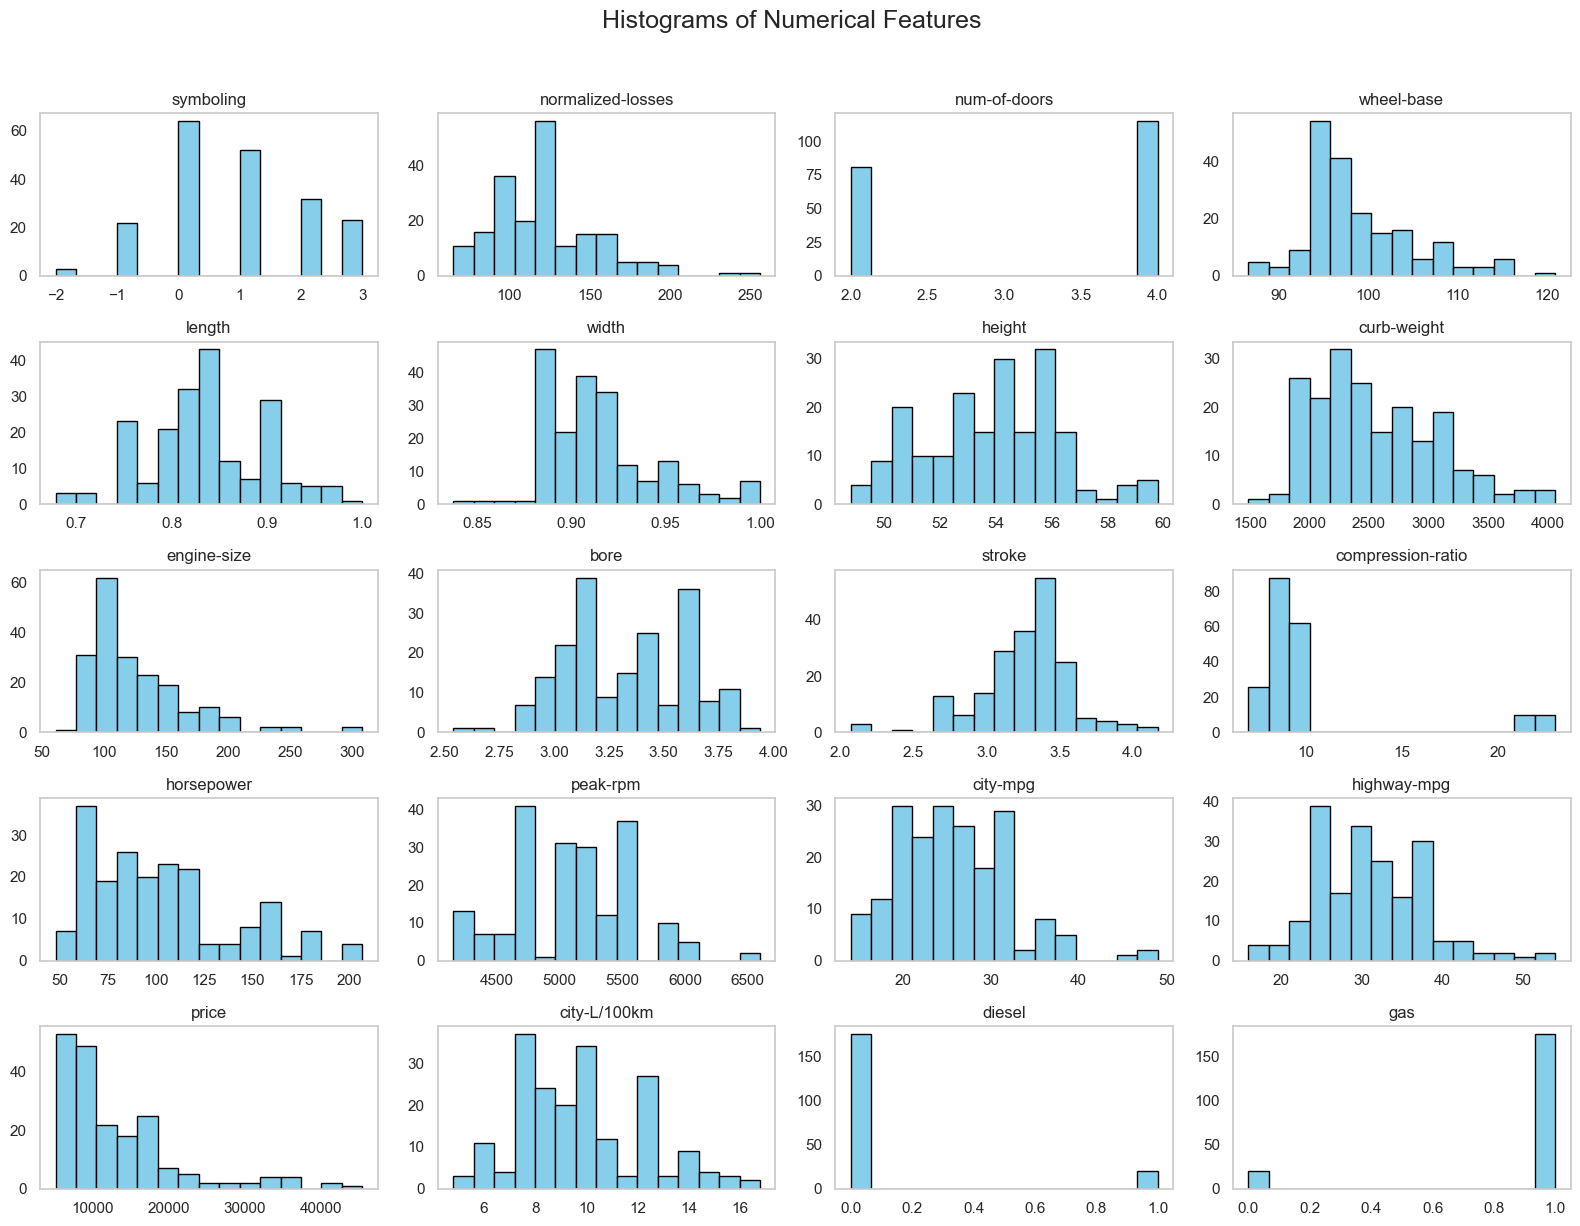

In [24]:
# Select only numeric columns (int, float)
num_df = df_clean.select_dtypes(include=['int64', 'float64'])

# Plot all numeric columns in one figure
num_df.hist(bins=15, figsize=(16, 12), color='skyblue', edgecolor='black', grid=False)

# Title for the whole plot
plt.suptitle("Histograms of Numerical Features", fontsize=18, y=1.02)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

##### Count plots for categorical columns

C:\Users\a12u\AppData\Local\Temp\ipykernel_24008\1167773840.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cat_df, x=col, order=cat_df[col].value_counts().index, ax=axes[i], palette='pastel')
C:\Users\a12u\AppData\Local\Temp\ipykernel_24008\1167773840.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cat_df, x=col, order=cat_df[col].value_counts().index, ax=axes[i], palette='pastel')
C:\Users\a12u\AppData\Local\Temp\ipykernel_24008\1167773840.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cat_df, x=col, or

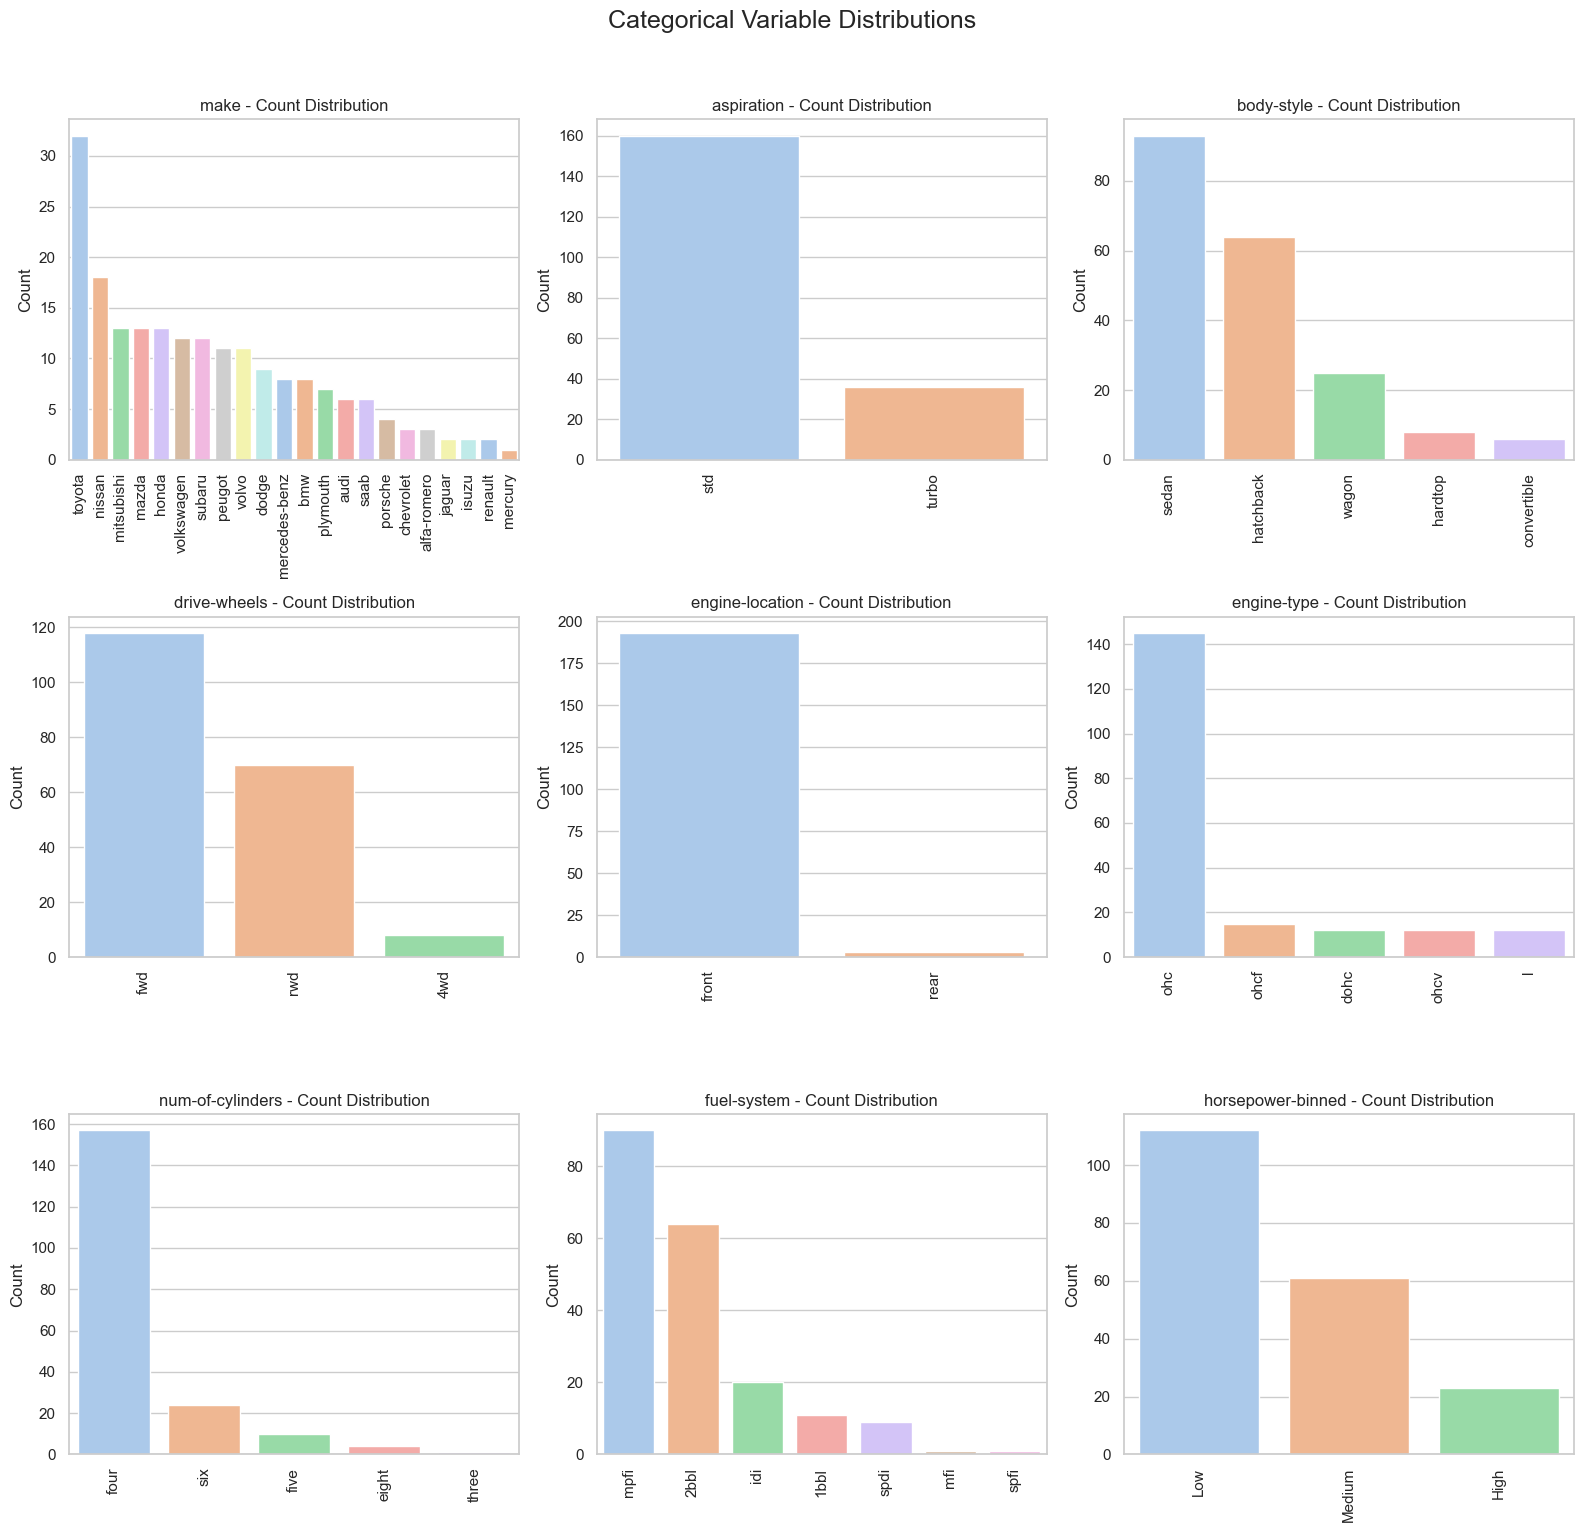

In [26]:
# Select categorical columns
cat_df = df_clean.select_dtypes(include='object')
cat_cols = cat_df.columns.tolist()

# Set up figure size and layout
n_cols = 3  # 2 plots per row
n_rows = (len(cat_cols) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()

# Create count plots for each categorical variable
for i, col in enumerate(cat_cols):
    sns.countplot(data=cat_df, x=col, order=cat_df[col].value_counts().index, ax=axes[i], palette='pastel')
    axes[i].set_title(f"{col} - Count Distribution", fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel("")  # Clear x-label for better readability
    axes[i].set_ylabel("Count")

# Remove any unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set a global title and layout
plt.suptitle("Categorical Variable Distributions", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


### 🔁 6. Bivariate Analysis

##### Correlation matrix

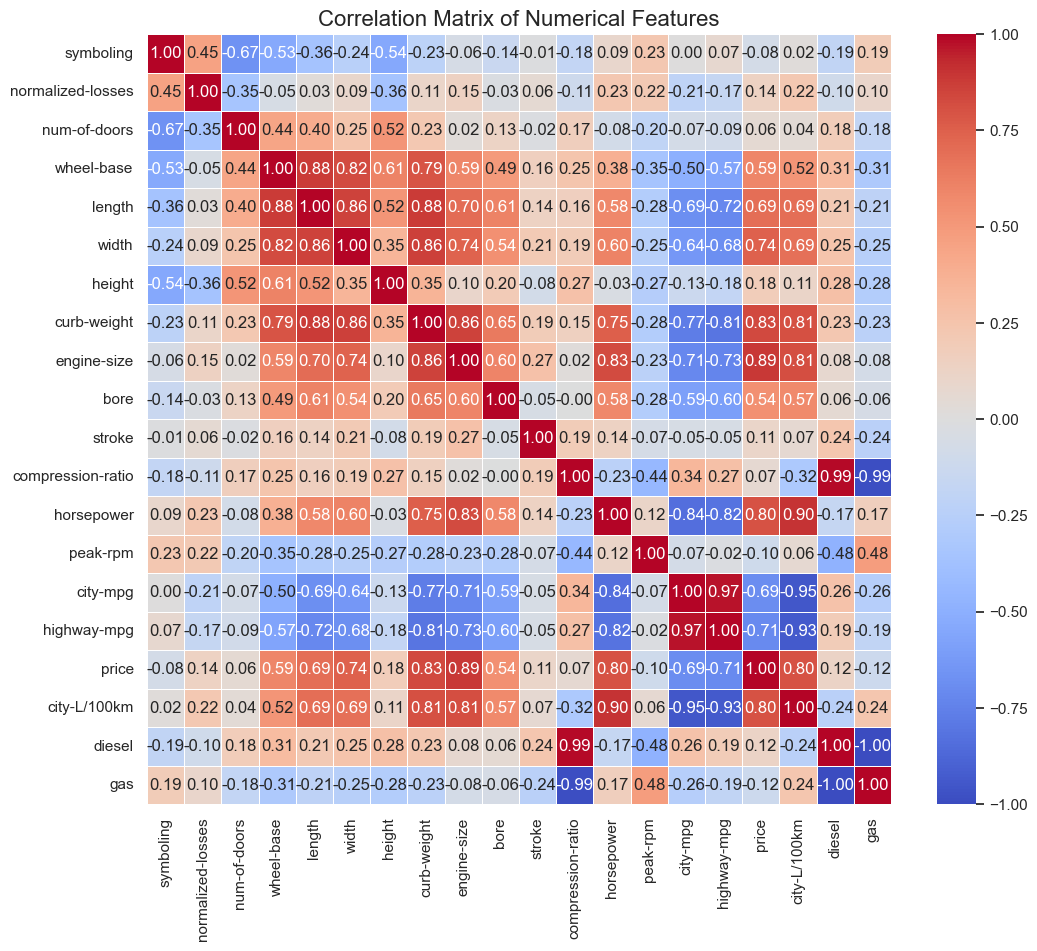

In [29]:
plt.figure(figsize=(12, 10))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.show()

##### Regression plots for important relationships

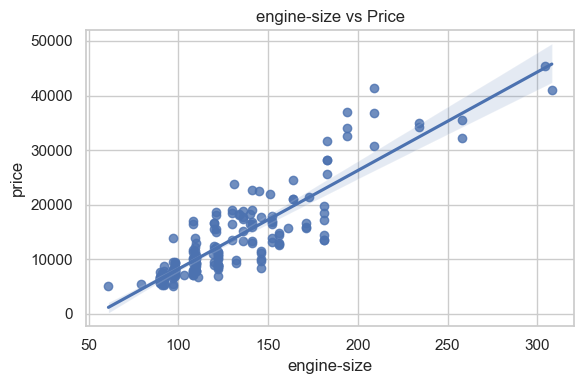

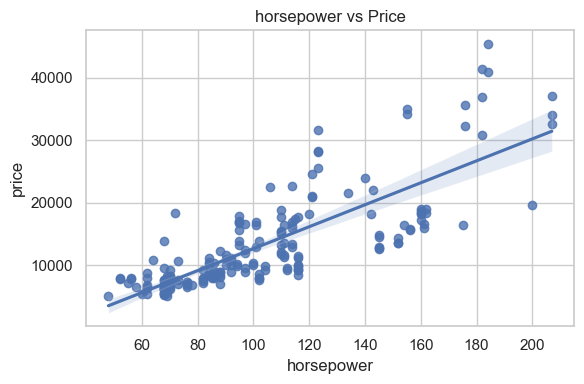

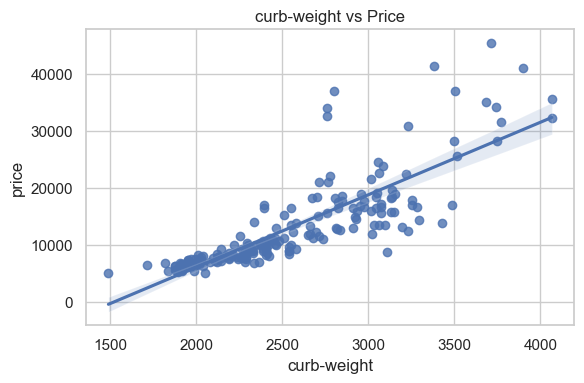

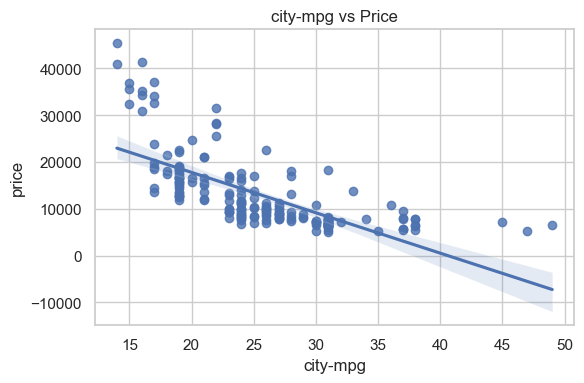

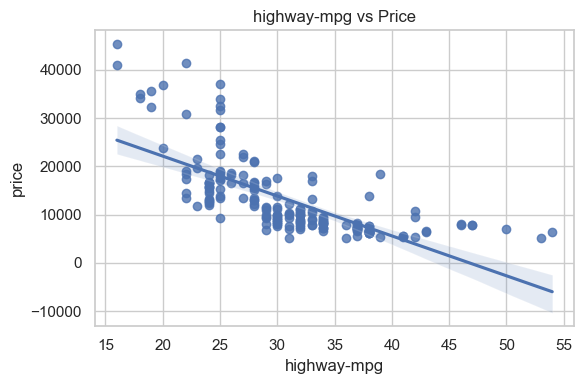

In [30]:
features = ['engine-size', 'horsepower', 'curb-weight', 'city-mpg', 'highway-mpg']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=feature, y='price', data=df_clean)
    plt.title(f"{feature} vs Price")
    plt.tight_layout()
    plt.show()

##### Box plots for price vs categorical variables

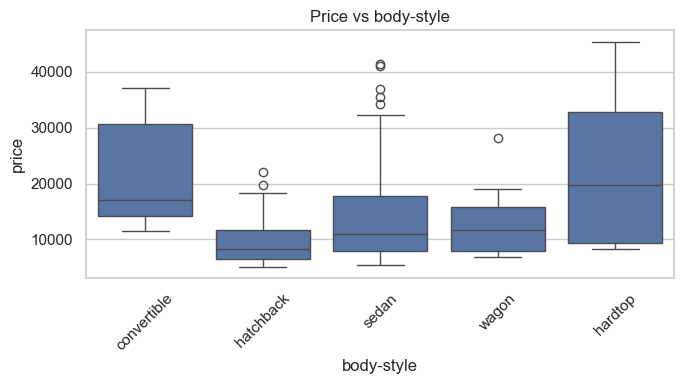

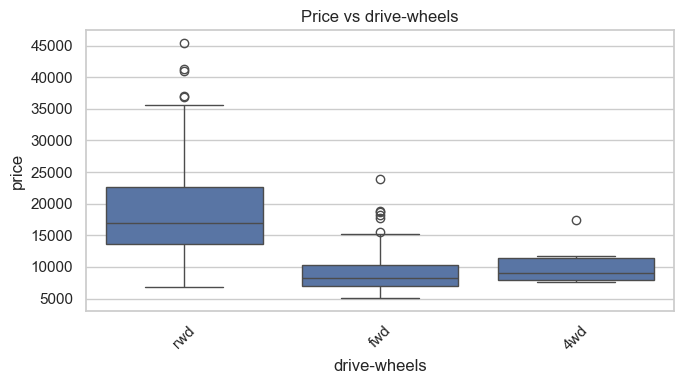

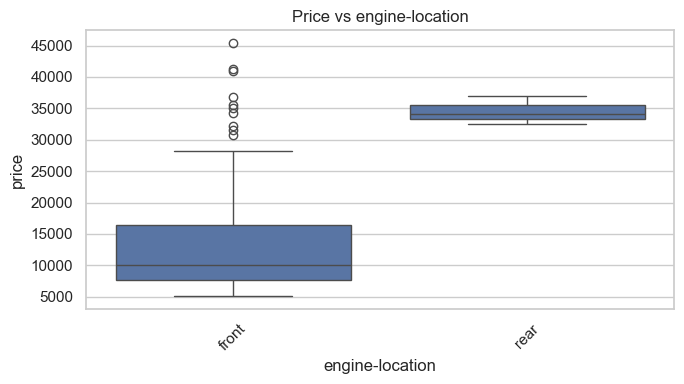

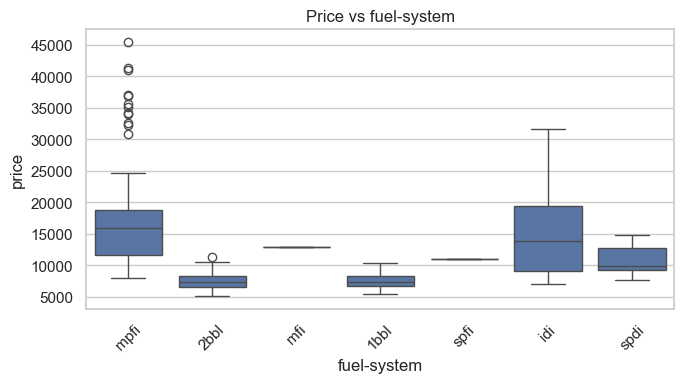

In [31]:
categorical = ['body-style', 'drive-wheels', 'engine-location', 'fuel-system']
for col in categorical:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=col, y='price', data=df_clean)
    plt.title(f"Price vs {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 📈 7. Grouped Aggregations

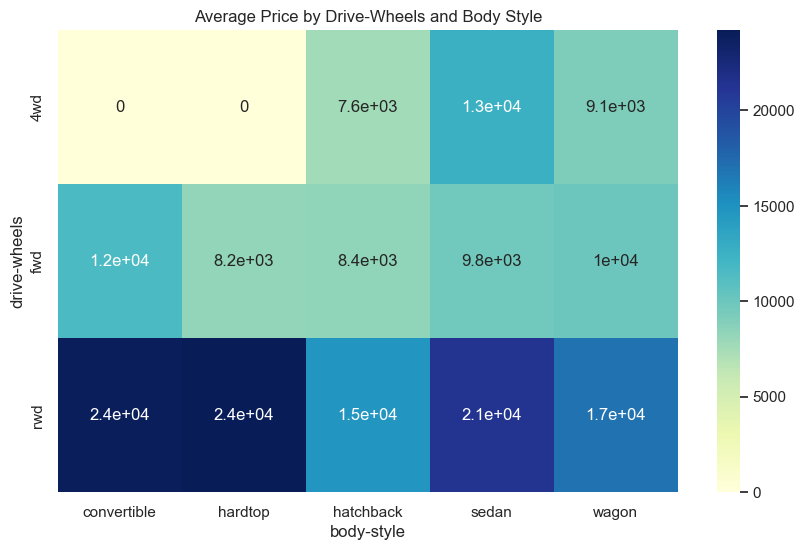

In [32]:
grouped = df_clean[['drive-wheels', 'body-style', 'price']].groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_pivot = grouped.pivot(index='drive-wheels', columns='body-style', values='price')
grouped_pivot.fillna(0, inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(grouped_pivot, annot=True, cmap="YlGnBu")
plt.title("Average Price by Drive-Wheels and Body Style")
plt.show()

✅ EDA Complete

Key Insights You Can Observe from the Visualizations

- Engine size, horsepower, and curb-weight are positively correlated with price
- Highway and city mpg are negatively correlated with price
- Drive wheels and body style strongly affect price

Author - Visura Rodrigo
